In [1]:
# ESC + b  => 현재 위치 아래 생성
# ESC + a  => 현재 위치 위 생성
# ESC + x => 삭제
# ESC + z => 삭제 취소
# Shift + Enter => cell 실행 다음 cell로 이동

In [2]:
# pandas 업그레이드
!pip install --upgrade pandas

# 01-Series

## #01.Pandas 개요
 - 데이터분석, 처리 등을 쉽게 하도록 만들어진 python package
 - 대용량 데이터를 보다 쉽고 안정적으로 처리 할 수 있다.
 
 ### 1) Pandas 설치
 > ipip install --upgrade pandas
 
 ### 2) Pandas의 자료 구조 ( List  > Numpy > Series  > DataFrame )
 
   | 이름 | 설명 |
   | ---- | ---- |
   | Series | index 와 value로 구성된 numpy 배열의 확장 객체 |
   | DataFrame | 열과 행으로 구성된 엑셀 표와 같은 구조로서 각 열을 이루는 단위는 Series 객체이다. |

## #02. 필요한 모듈 참조

pandas 패키지에서 `Series 클래스`를 가져오기 

In [3]:
from pandas import Series
from matplotlib import pyplot

## #03. Series 객체 생성하기
Series 클래스의 생성자 파라미터로 리스트나 Numpy 배열을 전달한다.

리스트 (혹은 배열)과 다른 점은 리스트의 경우 인덱스가 개념적으로만 존재하지만 Series는 인덱스가 명시적으로 존재한다.

### 1) 리스트 데이터 확인

In [4]:
items = [10,30,50,70,90]
items

[10, 30, 50, 70, 90]

### 2) 리스트 데이터 를 Series로 가공하기

In [5]:
column = Series(items)
column

0    10
1    30
2    50
3    70
4    90
dtype: int64

## #03. Series 데이터에 접근하기(인덱싱)

### 1) 인덱스를 활용한 개별 값 확인

In [6]:
print(column[0])
print(column[2])

10
50


### 2) 시리즈의 값들만 추출
타입을 확인하면 Numpy 배열임을 알 수 있다.

In [7]:
v = column.values
print(type(v))
v

<class 'numpy.ndarray'>


array([10, 30, 50, 70, 90], dtype=int64)

### 3) 시리즈의 값들을 저장하고 있는 numpy 배열을 list로 변환하기

In [8]:
v_list = list(v)
print(type(v_list))
v_list

<class 'list'>


[10, 30, 50, 70, 90]

### 04) 시리즈의 값들을 리스트로 직접 변환

In [9]:
v_list2 = list(column.values)
print(type(v_list2))
v_list2

<class 'list'>


[10, 30, 50, 70, 90]

### 05) 시리즈의 색인(index)만 추출

In [10]:
i = column.index
print(type(i))
i

<class 'pandas.core.indexes.range.RangeIndex'>


RangeIndex(start=0, stop=5, step=1)

### 06) 시리즈의 색인(index)를 list로 변환

In [11]:
i_list = list(column.index)
print(type(i_list))
i_list

<class 'list'>


[0, 1, 2, 3, 4]

### 07) 시리즈 객체 시각화
> index는 x축이 되고 value는 y축이 된다.

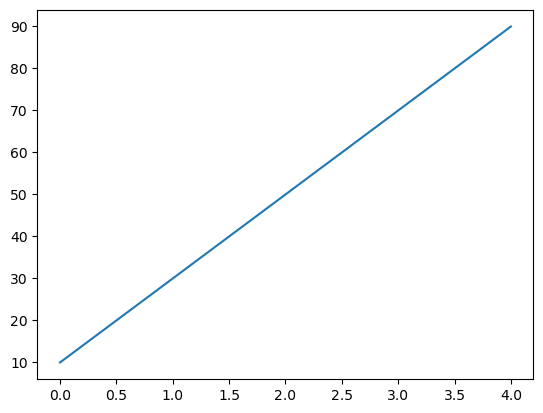

In [12]:
pyplot.figure()
pyplot.plot(column)
pyplot.show()

## #04. 시리즈에서 조건에 따른 데이터 접근
### 1) 특정 조건에 맞는 항목들만 추출
> 객체이름[객체이름에 대한 조건]

In [13]:
# 30 초과인 항목들만 추출
int1 = column[column > 30]
int1

2    50
3    70
4    90
dtype: int64

### 2) AND 조건

In [14]:
# 30이상 and 90 미만인 항목들만 추출
int2 = column[column>=30][column<90]
int2

1    30
2    50
3    70
dtype: int64

### 3) OR 조건
> 대괄호[] 안에 각 조건을 소괄호()로 묶고 파이프라인 | 으로 구분한다.

In [15]:
# 10이하 또는 70이상인 항목만 추출 -> () 필수
int3 = column[(column<=10) | (column>=70)]
int3

0    10
3    70
4    90
dtype: int64

## #05. 인덱스를 직접 지정하기

In [16]:
week1 = Series([290000,310000], index=['토','일'])
week1

토    290000
일    310000
dtype: int64

In [17]:
week2 = Series([120000,330000], index=['일','토'])
week2

일    120000
토    330000
dtype: int64

## #1) 시리즈 객체의 사친연산
> index 가 동일한 항목끼리 연산이 수행된다.

In [18]:
결과값 = week1 + week2
결과값

일    430000
토    620000
dtype: int64

In [19]:
결과값 = week1 - week2
결과값

일    190000
토    -40000
dtype: int64

In [20]:
결과값 = week1 * week2
결과값

일    37200000000
토    95700000000
dtype: int64

In [21]:
결과값 = week1 / week2
결과값

일    2.583333
토    0.878788
dtype: float64